In [1]:
import pandas as pd 
import numpy as np
import pdb

In [2]:
LoanAllocation_sheet  = pd.read_excel("../data1/SQLServerData/SampleData - CurtMain.xlsx",sheet_name="LoanAllocation")
MemberAddress_sheet  = pd.read_excel("../data1/SQLServerData/SampleData - CurtMain.xlsx",sheet_name="MemberAddress")
MemberBalances_sheet  = pd.read_excel("../data1/SQLServerData/SampleData - CurtMain.xlsx",sheet_name="MemberBalances")
MemberMain_sheet  = pd.read_excel("../data1/SQLServerData/SampleData - CurtMain.xlsx",sheet_name="MemberMain")

In [12]:
LoanAllocation_sheet.shape

(1000, 148)

In [3]:
print(set(LoanAllocation_sheet.columns) & set(MemberAddress_sheet.columns),
     set(LoanAllocation_sheet.columns) & set(MemberBalances_sheet.columns),
     set(LoanAllocation_sheet.columns) & set(MemberMain_sheet.columns))

{'MemberNo', 'ID'} {'LoanNumber', 'MemberNo', 'ProductCode', 'ProductType', 'MultipleApplied', 'InsuranceType', 'ID'} {'DOB', 'MemberNo'}


In [4]:
data_merge = pd.merge(LoanAllocation_sheet,MemberMain_sheet,on=['MemberNo']).T.drop_duplicates(keep='first').T
data_merge = data_merge.dropna(axis=0,how="all")
data_merge = data_merge.dropna(axis=1,thresh = 500)

column_name = ["LoanTypeCode","LoanTypeDesc"]
for i in data_merge.columns:
    if len(data_merge[i].unique())==1:
        column_name.append(i)
data_merge = data_merge.drop(column_name,axis=1)

# feature 

In [5]:
time_name= ["LoanDate","RepayDate","Guarantoradd2","LastPaymentDate","ApprovedOn","DOB_x","DOB_y","DOJ","NextStatement","LastUpdatedOn"]

for i in time_name:
    data_merge[i+"_diff"] =data_merge[i] -data_merge[i].values.min()
data_merge.to_csv("./data/all_data.csv")

# train and test split

In [7]:
train_0_data = data_merge[data_merge["Approved"]==0].iloc[36:]
train_1_data = data_merge[data_merge["Approved"]==1].iloc[164:]
# pd.concat([train_0_data,train_1_data],axis=0).to_csv("./data/train_data_new.csv")

test_0_data = data_merge[data_merge["Approved"]==0].iloc[:36]
test_1_data = data_merge[data_merge["Approved"]==1].iloc[:164]
pd.concat([test_0_data,test_1_data],axis=0).to_csv("./data/test_data_new.csv")

In [9]:
from utils import *
train_data , train_label ,_ = preprocess_uci_dataset('exp','./data')

Dataset exp loading.


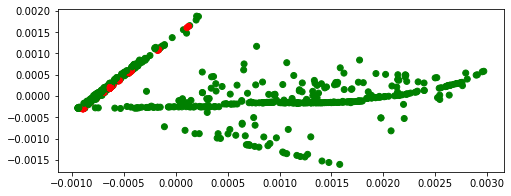

In [10]:
import pylab

import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 

pca= PCA(n_components=5) 
pca_2d = pca.fit_transform(train_data)
c_ = {0:'r',1:'g'}
color = [c_[i] for i in train_label]
fig= plt.figure(figsize=(8,3)) 
plt.scatter(pca_2d[:,0],pca_2d[:,1],c = color)
plt.show()